# 1. Pengaturan awal

In [ ]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

# 2. Seleksi data gambar

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'dataset-money-classification' 

In [ ]:
image_exts = ['jpg','jpeg','png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('dataset-money-classification')

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
class_names = data.class_names
print(class_names)

In [ ]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])

# 4. Scaling

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 5. train test val split

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
len(data)

In [ ]:
train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

# 6. Model

In [ ]:
train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# 8. Plot Performa

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# Menggunakan model untuk melakukan prediksi pada data uji
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test], axis=0)
final_val_accuracy = hist.history['val_accuracy'][-1]

# Menghitung matriks konfusi
confusion_matrix = tf.math.confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix.numpy())

# Menghitung presisi, recall, dan f1 score
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
precision.update_state(true_labels, predicted_labels)
recall.update_state(true_labels, predicted_labels)
precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
f1_score = 2 * (precision_result * recall_result) / (precision_result + recall_result)

print("Accuracy:", final_val_accuracy)
print("Precision:", precision_result)
print("Recall:", recall_result)
print("F1 Score:", f1_score)


# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread(r"C:\Users\muham\Downloads\community-490d53f4ee2a5f49566b761975359fe4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
y_pred = model.predict(np.expand_dims(resize/255, 0))
#melakukan prediksi dengan nilai tertinggi sebagai hasil
predicted_class = np.argmax(y_pred)

# Tampilkan label kelas prediksi
print(f'Prediksi kelas: {class_names[predicted_class]}')

In [ ]:
y_pred

In [ ]:
print(class_names)

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow import keras

In [ ]:
from tensorflow.keras.saving import save_model

save_model(model, os.path.join('models','imageclassifier hapus.keras'))

In [ ]:
# model = keras.models.load_model(r"C:/Users/muham/Downloads/Dataset Tugas Deep Learning/models/imageclassifier hapus.keras")
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

2025-05-29 05:21:41.464139: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 05:21:41.466239: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 05:21:41.508946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 05:21:41.510261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-29 05:21:42.274765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Found 2656 files belonging to 7 classes.


2025-05-29 05:21:44.545948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]
2025-05-29 05:21:44.546279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2656]
	 [[{{node Placeholder/_0}}]]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 23,602,055
Trainable params: 14,343
Non-trainable params: 23,587,712
____________________________________________

2025-05-29 05:21:47.181333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]
2025-05-29 05:21:47.181761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]


58/58 [==============================] - ETA: 0s - loss: 2.0657 - accuracy: 0.1449

2025-05-29 05:23:57.104523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]
2025-05-29 05:23:57.105206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]


58/58 [==============================] - 169s 3s/step - loss: 2.0657 - accuracy: 0.1449 - val_loss: 1.9797 - val_accuracy: 0.1738
Epoch 2/10
58/58 [==============================] - 167s 3s/step - loss: 2.0405 - accuracy: 0.1509 - val_loss: 1.9639 - val_accuracy: 0.1504
Epoch 3/10
58/58 [==============================] - 166s 3s/step - loss: 2.0121 - accuracy: 0.1487 - val_loss: 1.9543 - val_accuracy: 0.1406
Epoch 4/10
58/58 [==============================] - 168s 3s/step - loss: 2.0055 - accuracy: 0.1466 - val_loss: 1.9499 - val_accuracy: 0.2090
Epoch 5/10
58/58 [==============================] - 168s 3s/step - loss: 2.0031 - accuracy: 0.1573 - val_loss: 1.9468 - val_accuracy: 0.1387
Epoch 6/10
58/58 [==============================] - 169s 3s/step - loss: 1.9793 - accuracy: 0.1568 - val_loss: 1.9637 - val_accuracy: 0.1641
Epoch 7/10
58/58 [==============================] - 169s 3s/step - loss: 1.9746 - accuracy: 0.1568 - val_loss: 1.9445 - val_accuracy: 0.1777
Epoch 8/10
58/58 [======

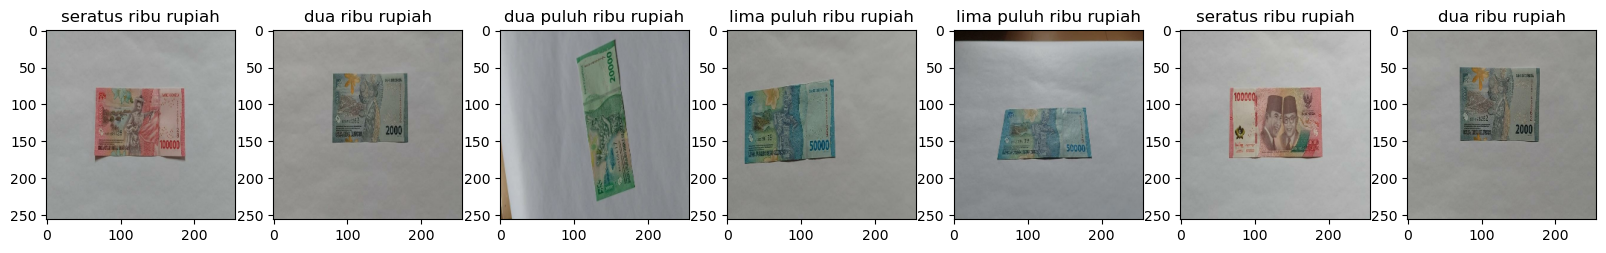

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tf2onnx
import onnx

# Load data
data = tf.keras.utils.image_dataset_from_directory('dataset-money-classification')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
class_names = data.class_names

# Visualize data
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])

# Normalize data
data = data.map(lambda x,y: (x/255, y))

# Split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Create ResNet50 model with pretrained weights
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained ResNet50 (without top layer)
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

# Freeze base model layers (optional - you can unfreeze for fine-tuning)
base_model.trainable = False

# Add custom classification head
inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs, outputs)

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

# Training callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train model
hist = model.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=[tensorboard_callback, early_stopping]
)



2025-05-29 06:23:07.541909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]
2025-05-29 06:23:07.542492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2656]
	 [[{{node Placeholder/_4}}]]


8/8 [==============================] - 19s 2s/step - loss: 1.9424 - accuracy: 0.1484
Test Accuracy: 0.1484

Classification Report:
                        precision    recall  f1-score   support

 dua puluh ribu rupiah       0.00      0.00      0.00        32
       dua ribu rupiah       0.29      0.17      0.21        30
lima puluh ribu rupiah       0.00      0.00      0.00        41
      lima ribu rupiah       0.16      0.97      0.28        40
   sepuluh ribu rupiah       0.00      0.00      0.00        46
   seratus ribu rupiah       0.00      0.00      0.00        34
         seribu rupiah       0.00      0.00      0.00        33

              accuracy                           0.17       256
             macro avg       0.07      0.16      0.07       256
          weighted avg       0.06      0.17      0.07       256



/home/whoami/anaconda3/envs/av_sim/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/whoami/anaconda3/envs/av_sim/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/whoami/anaconda3/envs/av_sim/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

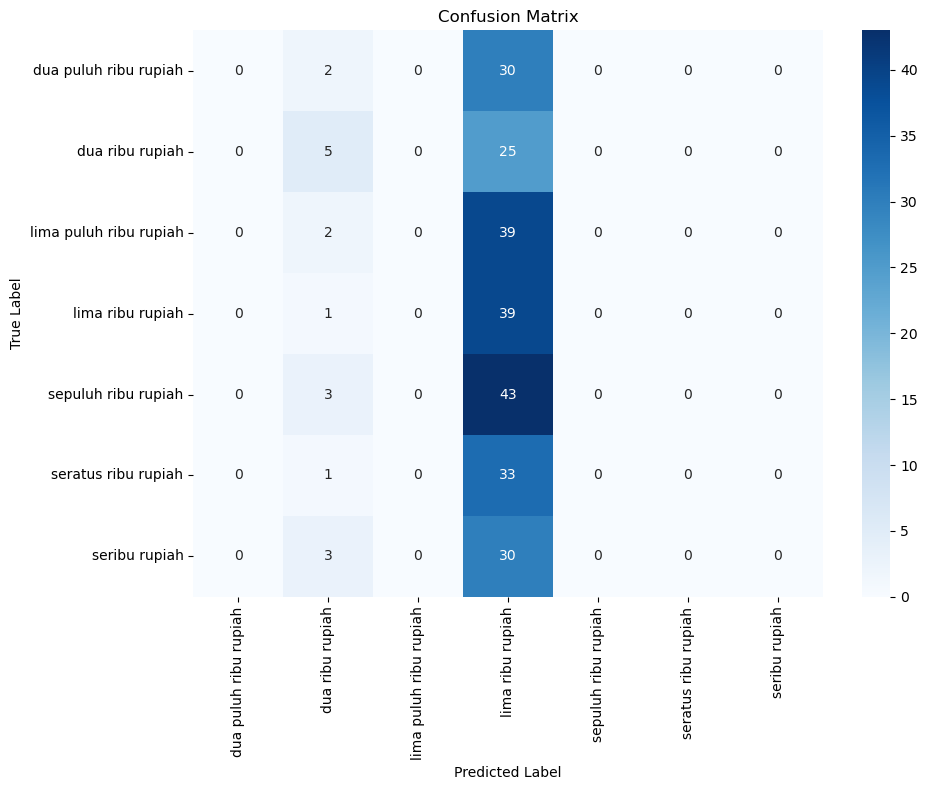

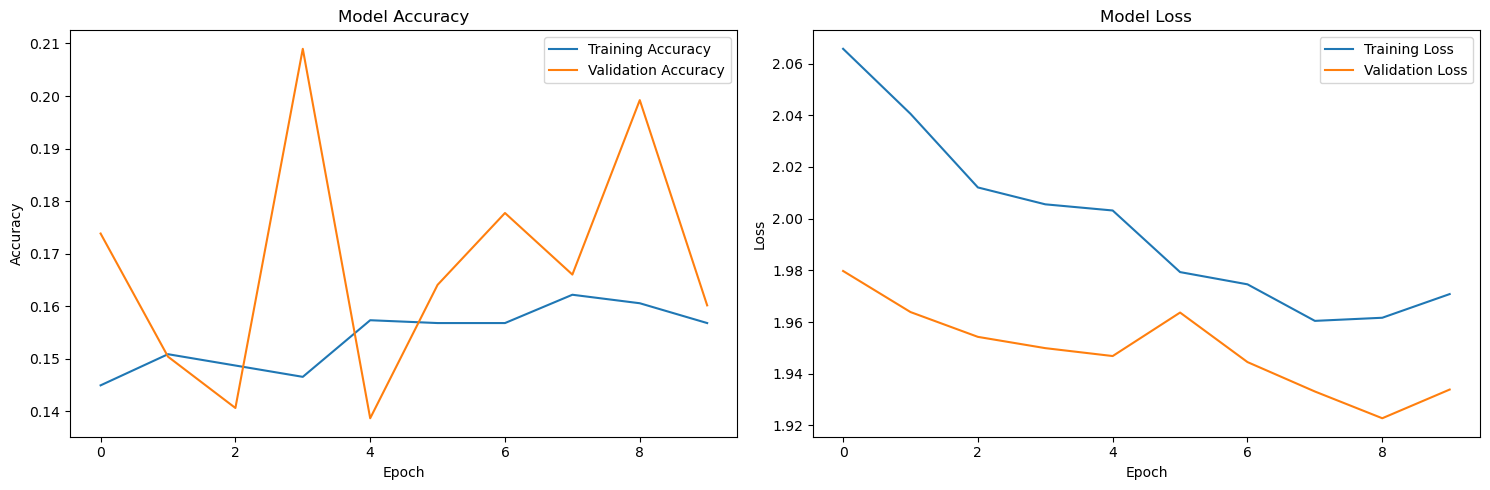


Saving model in different formats...


2025-05-29 06:23:53.558300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2048]
	 [[{{node inputs}}]]
2025-05-29 06:23:56.840193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2048]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: resnet50_money_model/assets


INFO:tensorflow:Assets written to: resnet50_money_model/assets


✓ Saved as TensorFlow SavedModel


2025-05-29 06:24:10.487580: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-05-29 06:24:10.487616: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-05-29 06:24:10.488175: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: resnet50_money_model
2025-05-29 06:24:10.513680: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2025-05-29 06:24:10.513715: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: resnet50_money_model
2025-05-29 06:24:10.567684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2025-05-29 06:24:10.590156: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-05-29 06:24:11.125313: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: resnet50_money_m

✓ Saved as TFLite model


2025-05-29 06:24:17.472110: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2025-05-29 06:24:17.472222: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2025-05-29 06:24:19.350137: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2025-05-29 06:24:19.350262: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


✓ Saved as ONNX model

Testing TFLite model inference...


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Original model prediction: lima ribu rupiah
TFLite model prediction: dua ribu rupiah
True label: seribu rupiah

Model files saved:
- resnet50_money_model/ (TensorFlow SavedModel)
- resnet50_money_model.tflite (TensorFlow Lite)
- resnet50_money_model.onnx (ONNX format)

OPTIONAL: Fine-tuning the model
Model ready for fine-tuning with unfrozen base layers.
Uncomment the following lines to perform fine-tuning:

# Fine-tune for a few more epochs
# hist_finetune = model.fit(
#     train,
#     epochs=5,
#     validation_data=val,
#     callbacks=[tensorboard_callback, early_stopping]
# )



In [2]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for evaluation metrics
y_pred = []
y_true = []

for x, y in test:
    predictions = model.predict(x, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(y.numpy())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save model in different formats
print("\nSaving model in different formats...")

# 1. Save as TensorFlow SavedModel
model.save('resnet50_money_model')
print("✓ Saved as TensorFlow SavedModel")

# 2. Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('resnet50_money_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save TFLite model
with open('resnet50_money_model.tflite', 'wb') as f:
    f.write(tflite_model)
print("✓ Saved as TFLite model")

# 3. Convert to ONNX
try:
    # Convert TensorFlow model to ONNX
    spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32, name="input"),)
    output_path = "resnet50_money_model.onnx"
    
    model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)
    onnx.save(model_proto, output_path)
    print("✓ Saved as ONNX model")
    
except Exception as e:
    print(f"Error converting to ONNX: {e}")
    print("You may need to install tf2onnx: pip install tf2onnx")

# Test TFLite model inference
print("\nTesting TFLite model inference...")
interpreter = tf.lite.Interpreter(model_path='resnet50_money_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test with a sample from test set
sample_batch = next(iter(test))
sample_image = sample_batch[0][0:1]  # Take first image
sample_label = sample_batch[1][0]

# Run inference
interpreter.set_tensor(input_details[0]['index'], sample_image)
interpreter.invoke()
tflite_prediction = interpreter.get_tensor(output_details[0]['index'])

# Compare with original model
original_prediction = model.predict(sample_image, verbose=0)

print(f"Original model prediction: {class_names[np.argmax(original_prediction)]}")
print(f"TFLite model prediction: {class_names[np.argmax(tflite_prediction)]}")
print(f"True label: {class_names[sample_label]}")

print("\nModel files saved:")
print("- resnet50_money_model/ (TensorFlow SavedModel)")
print("- resnet50_money_model.tflite (TensorFlow Lite)")
print("- resnet50_money_model.onnx (ONNX format)")

# Optional: Fine-tuning
print("\n" + "="*50)
print("OPTIONAL: Fine-tuning the model")
print("="*50)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

print("Model ready for fine-tuning with unfrozen base layers.")
print("Uncomment the following lines to perform fine-tuning:")
print("""
# Fine-tune for a few more epochs
# hist_finetune = model.fit(
#     train,
#     epochs=5,
#     validation_data=val,
#     callbacks=[tensorboard_callback, early_stopping]
# )
""")

TESTING SINGLE IMAGE - RESNET50 MONEY CLASSIFICATION
Testing image: /home/whoami/Unduhan/50k.jpeg
Image shape after preprocessing: (1, 256, 256, 3)


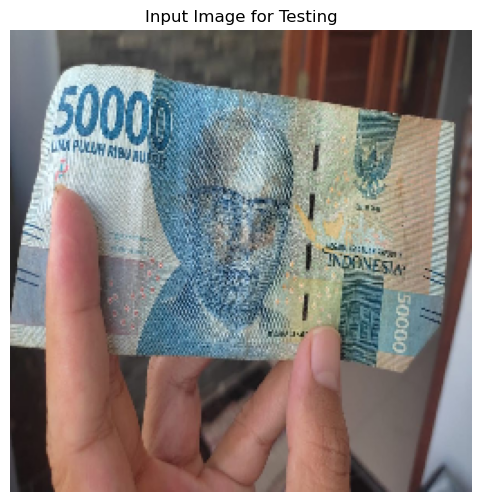


TESTING dengan TensorFlow Model
Predicted Class: 10000
Confidence: 17.54%

Probabilitas semua kelas:
1000: 11.33%
2000: 13.56%
5000: 13.27%
10000: 17.54%
20000: 14.50%
50000: 15.79%
100000: 14.00%

TESTING dengan TFLite Model
Predicted Class: 2000
Confidence: 28.74%

Probabilitas semua kelas:
1000: 8.05%
2000: 28.74%
5000: 14.11%
10000: 10.85%
20000: 13.41%
50000: 13.16%
100000: 11.68%

VISUALISASI HASIL


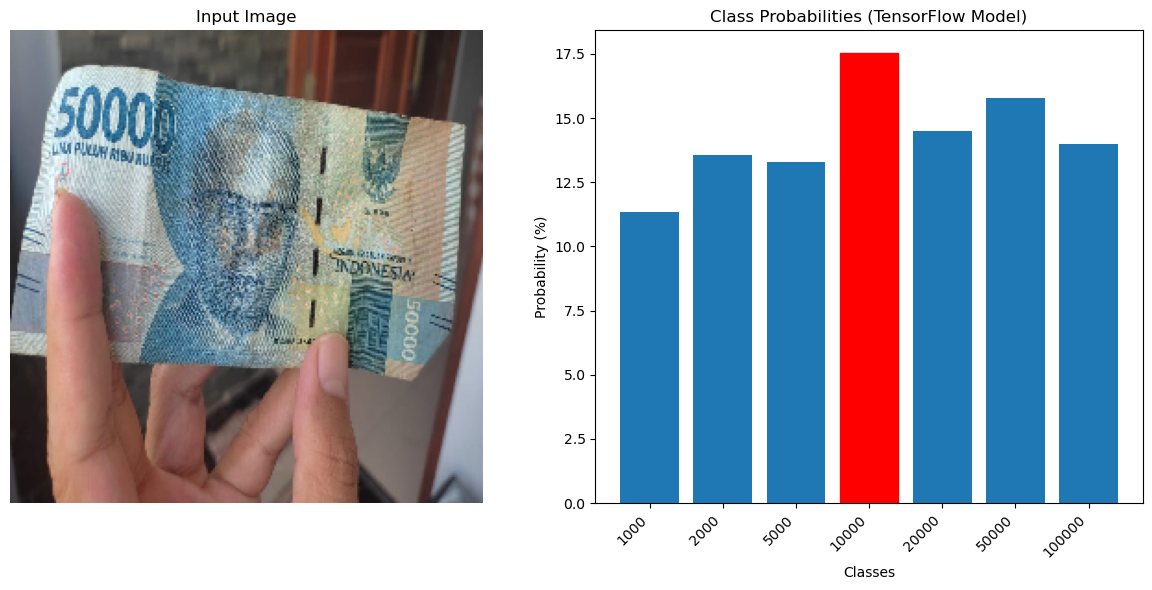


CARA PENGGUNAAN:
1. Ganti IMAGE_PATH dengan path ke gambar Anda
2. Sesuaikan CLASS_NAMES dengan kelas di dataset Anda
3. Pastikan model sudah di-train dan tersimpan
4. Jalankan kode ini


In [4]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import cv2

# =====================================================
# TESTING DENGAN 1 GAMBAR
# =====================================================

def test_single_image(image_path, model_path=None, tflite_path=None, class_names=None):
    """
    Test single image dengan berbagai format model
    
    Args:
        image_path: Path ke gambar yang akan di-test
        model_path: Path ke TensorFlow model (opsional)
        tflite_path: Path ke TFLite model (opsional) 
        class_names: List nama kelas
    """
    
    # Load dan preprocess gambar
    def preprocess_image(img_path):
        # Method 1: Menggunakan tf.keras.utils.load_img
        img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize
        return img_array, img
    
    # Preprocess gambar
    processed_image, original_image = preprocess_image(image_path)
    
    print(f"Testing image: {image_path}")
    print(f"Image shape after preprocessing: {processed_image.shape}")
    
    # Tampilkan gambar
    plt.figure(figsize=(8, 6))
    plt.imshow(original_image)
    plt.title("Input Image for Testing")
    plt.axis('off')
    plt.show()
    
    results = {}
    
    # =====================================================
    # TEST 1: TensorFlow Model
    # =====================================================
    if model_path:
        print("\n" + "="*50)
        print("TESTING dengan TensorFlow Model")
        print("="*50)
        
        try:
            # Load model
            model = tf.keras.models.load_model(model_path)
            
            # Predict
            predictions = model.predict(processed_image, verbose=0)
            predicted_class_idx = np.argmax(predictions, axis=1)[0]
            confidence = np.max(predictions) * 100
            
            if class_names:
                predicted_class = class_names[predicted_class_idx]
            else:
                predicted_class = f"Class {predicted_class_idx}"
            
            results['tensorflow'] = {
                'class': predicted_class,
                'confidence': confidence,
                'class_idx': predicted_class_idx,
                'all_probabilities': predictions[0]
            }
            
            print(f"Predicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}%")
            
            # Tampilkan probabilitas semua kelas
            if class_names:
                print("\nProbabilitas semua kelas:")
                for i, (class_name, prob) in enumerate(zip(class_names, predictions[0])):
                    print(f"{class_name}: {prob*100:.2f}%")
                    
        except Exception as e:
            print(f"Error loading TensorFlow model: {e}")
    
    # =====================================================
    # TEST 2: TFLite Model
    # =====================================================
    if tflite_path:
        print("\n" + "="*50)
        print("TESTING dengan TFLite Model")
        print("="*50)
        
        try:
            # Load TFLite model
            interpreter = tf.lite.Interpreter(model_path=tflite_path)
            interpreter.allocate_tensors()
            
            # Get input and output tensors
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()
            
            # Set input tensor
            interpreter.set_tensor(input_details[0]['index'], processed_image.astype(np.float32))
            
            # Run inference
            interpreter.invoke()
            
            # Get output
            tflite_predictions = interpreter.get_tensor(output_details[0]['index'])
            predicted_class_idx = np.argmax(tflite_predictions, axis=1)[0]
            confidence = np.max(tflite_predictions) * 100
            
            if class_names:
                predicted_class = class_names[predicted_class_idx]
            else:
                predicted_class = f"Class {predicted_class_idx}"
            
            results['tflite'] = {
                'class': predicted_class,
                'confidence': confidence,
                'class_idx': predicted_class_idx,
                'all_probabilities': tflite_predictions[0]
            }
            
            print(f"Predicted Class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}%")
            
            # Tampilkan probabilitas semua kelas
            if class_names:
                print("\nProbabilitas semua kelas:")
                for i, (class_name, prob) in enumerate(zip(class_names, tflite_predictions[0])):
                    print(f"{class_name}: {prob*100:.2f}%")
                    
        except Exception as e:
            print(f"Error loading TFLite model: {e}")
    
    # =====================================================
    # VISUALISASI HASIL
    # =====================================================
    if class_names and (results.get('tensorflow') or results.get('tflite')):
        print("\n" + "="*50)
        print("VISUALISASI HASIL")
        print("="*50)
        
        # Ambil hasil dari model yang tersedia
        if 'tensorflow' in results:
            probs = results['tensorflow']['all_probabilities']
            model_type = "TensorFlow"
        else:
            probs = results['tflite']['all_probabilities']
            model_type = "TFLite"
        
        # Plot bar chart probabilitas
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title("Input Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        bars = plt.bar(range(len(class_names)), probs * 100)
        plt.xlabel('Classes')
        plt.ylabel('Probability (%)')
        plt.title(f'Class Probabilities ({model_type} Model)')
        plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
        
        # Highlight predicted class
        max_idx = np.argmax(probs)
        bars[max_idx].set_color('red')
        
        plt.tight_layout()
        plt.show()
    
    return results

# =====================================================
# CONTOH PENGGUNAAN
# =====================================================

# Ganti dengan path gambar Anda
IMAGE_PATH = "/home/whoami/Unduhan/50k.jpeg"  # <-- GANTI INI

# Class names (sesuaikan dengan dataset Anda)
# Ambil dari training sebelumnya atau definisikan manual
CLASS_NAMES = [
    "1000", "2000", "5000", "10000", "20000", "50000", "100000"
]  # <-- SESUAIKAN dengan kelas di dataset Anda

print("="*60)
print("TESTING SINGLE IMAGE - RESNET50 MONEY CLASSIFICATION")
print("="*60)

# Test dengan berbagai model
results = test_single_image(
    image_path=IMAGE_PATH,
    model_path="resnet50_money_model",  # Path ke TensorFlow model
    tflite_path="resnet50_money_model.tflite",  # Path ke TFLite model
    class_names=CLASS_NAMES
)

# =====================================================
# FUNGSI TAMBAHAN: BATCH TESTING
# =====================================================

def test_multiple_images(image_paths, model_path, class_names):
    """
    Test multiple images sekaligus
    """
    model = tf.keras.models.load_model(model_path)
    
    results = []
    
    fig, axes = plt.subplots(2, len(image_paths), figsize=(4*len(image_paths), 8))
    if len(image_paths) == 1:
        axes = axes.reshape(2, 1)
    
    for i, img_path in enumerate(image_paths):
        # Preprocess
        img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        
        # Predict
        predictions = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions) * 100
        predicted_class = class_names[predicted_class_idx]
        
        results.append({
            'image_path': img_path,
            'predicted_class': predicted_class,
            'confidence': confidence
        })
        
        # Plot image
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"Image {i+1}")
        axes[0, i].axis('off')
        
        # Plot probabilities
        axes[1, i].bar(range(len(class_names)), predictions[0] * 100)
        axes[1, i].set_title(f"Pred: {predicted_class}\nConf: {confidence:.1f}%")
        axes[1, i].set_xlabel('Classes')
        axes[1, i].set_ylabel('Probability (%)')
        axes[1, i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return results

# Contoh untuk test multiple images
# image_list = ["test1.jpg", "test2.jpg", "test3.jpg"]
# batch_results = test_multiple_images(image_list, "resnet50_money_model", CLASS_NAMES)

print("\n" + "="*60)
print("CARA PENGGUNAAN:")
print("="*60)
print("1. Ganti IMAGE_PATH dengan path ke gambar Anda")
print("2. Sesuaikan CLASS_NAMES dengan kelas di dataset Anda")
print("3. Pastikan model sudah di-train dan tersimpan")
print("4. Jalankan kode ini")
print("="*60)